
## Create dataset time delays 1 hour , 6 hours, pre-cast

* time delays


In [1]:

import pandas as pd
import numpy as np


In [2]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:

import matplotlib 
## import pytorch_lightning as pl
import torch 

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable


In [4]:

## Requires Python = 3.9


In [5]:

for_RNN_data_CIVS = pd.read_csv('input/FINAL_RNN_mapped_dates_266096_rcalix_THIS_ONE.csv')


In [6]:

for_RNN_data_CIVS.head(5)


,Unnamed: 0,Timestamp_f1,MM_Timestamp_f1,THEORETICAL_TONNAGE_f3,Coke_Rate_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,SNORT_VALVE_POSITION_f3,COLD_BLAST_MOISTURE_f3,HOST_BLAST_MOISTURE_f3,...,Cast_Avg_Ti_f2,Slag_Fe_f2,Slag_SiO2_f2,Slag_Al2O3_f2,Slag_CaO_f2,Slag_MgO_f2,Slag_S_f2,Slag_K2O_f2,Slag_B_SiO2_f2,Slag_TiO2_f2
0,0,2021-08-01 01:23:00,2021-08-01 00:00:00,6006,992,1999.604384,179.749638,98.334297,4.997585,8.084517,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
1,1,2021-08-01 01:23:00,2021-08-01 00:01:00,6006,992,2000.288837,179.765945,98.334297,5.000531,8.079545,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
2,2,2021-08-01 01:23:00,2021-08-01 00:02:00,6006,992,1999.242862,179.782251,98.334297,5.003476,8.074573,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
3,3,2021-08-01 01:23:00,2021-08-01 00:03:00,6006,992,1999.884442,179.798490,98.334297,5.006422,8.069602,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
4,4,2021-08-01 01:23:00,2021-08-01 00:04:00,6006,992,1999.849729,179.784430,98.334297,5.009368,8.064630,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41


In [7]:

for_RNN_data_CIVS.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266096 entries, 0 to 266095
Data columns (total 110 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    Unnamed: 0                 int64  
 1    Timestamp_f1               object 
 2    MM_Timestamp_f1            object 
 3    THEORETICAL_TONNAGE_f3     int64  
 4    Coke_Rate_f3               int64  
 5    HOT_BLAST_TMP_NS_f3        float64
 6    WINDRATE_f3                float64
 7    SNORT_VALVE_POSITION_f3    float64
 8    COLD_BLAST_MOISTURE_f3     float64
 9    HOST_BLAST_MOISTURE_f3     float64
 10   HIGH_PURITY_OXYGEN_f3      float64
 11   COAL_FLOW_f3               float64
 12   NAT_GAS _INJECTION_f3      float64
 13   HOT_BLAST_PRESSURE_f3      float64
 14   TOP_PRESS_f3               float64
 15   TOP_TEMP_HIGHEST_f3        float64
 16   Top_Gas_ETACO_f3           float64
 17   Selec_Top_Gas_CO_f3        float64
 18   Selec_Top_Gas_CO2_f3       float64
 19   Selec_Top_Gas_H2_f3  

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes

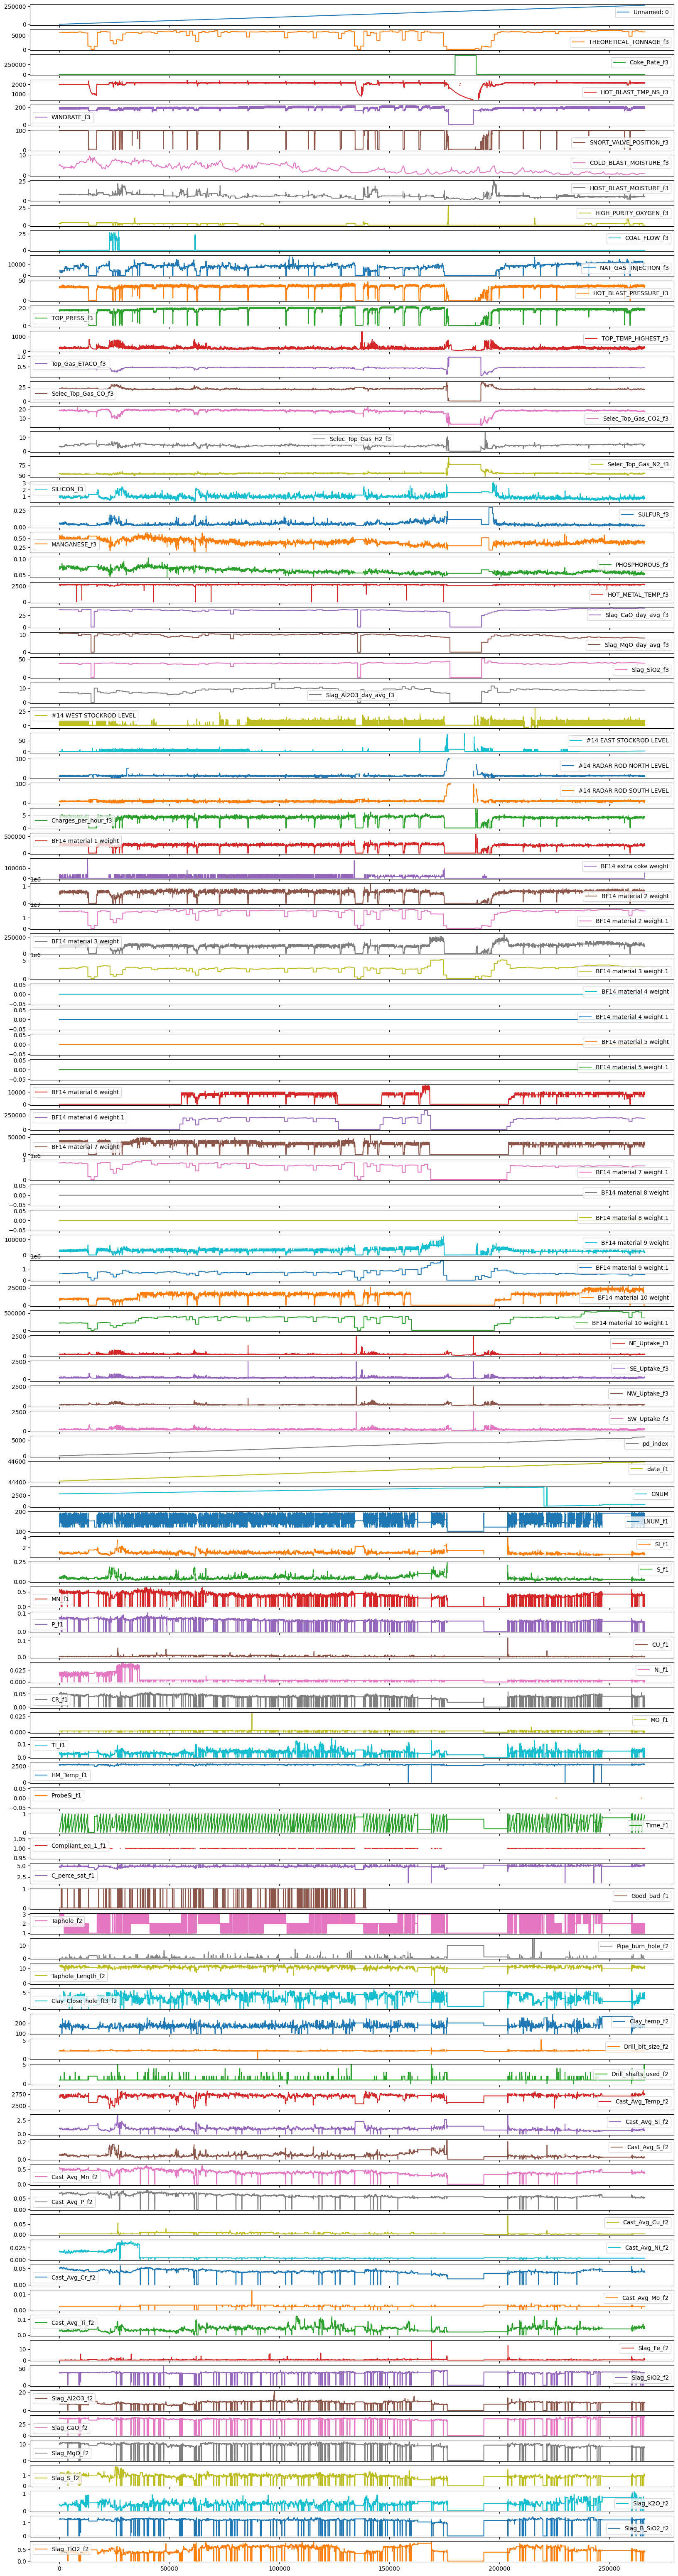

In [8]:

for_RNN_data_CIVS.plot( figsize=(20,80),  subplots=True   )


In [9]:

for_RNN_data_CIVS


,Unnamed: 0,Timestamp_f1,MM_Timestamp_f1,THEORETICAL_TONNAGE_f3,Coke_Rate_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,SNORT_VALVE_POSITION_f3,COLD_BLAST_MOISTURE_f3,HOST_BLAST_MOISTURE_f3,...,Cast_Avg_Ti_f2,Slag_Fe_f2,Slag_SiO2_f2,Slag_Al2O3_f2,Slag_CaO_f2,Slag_MgO_f2,Slag_S_f2,Slag_K2O_f2,Slag_B_SiO2_f2,Slag_TiO2_f2
0,0,2021-08-01 01:23:00,2021-08-01 00:00:00,6006,992,1999.604384,179.749638,98.334297,4.997585,8.084517,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
1,1,2021-08-01 01:23:00,2021-08-01 00:01:00,6006,992,2000.288837,179.765945,98.334297,5.000531,8.079545,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
2,2,2021-08-01 01:23:00,2021-08-01 00:02:00,6006,992,1999.242862,179.782251,98.334297,5.003476,8.074573,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
3,3,2021-08-01 01:23:00,2021-08-01 00:03:00,6006,992,1999.884442,179.798490,98.334297,5.006422,8.069602,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
4,4,2021-08-01 01:23:00,2021-08-01 00:04:00,6006,992,1999.849729,179.784430,98.334297,5.009368,8.064630,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266091,266091,2022-01-31 22:16:00,2022-01-31 22:12:00,6322,924,2167.603916,189.029098,98.334297,1.151288,5.105940,...,0.041,0.32,39.090000,8.67,40.560001,7.86,0.99,0.56,1.24,0.42
266092,266092,2022-01-31 22:16:00,2022-01-31 22:13:00,6322,924,2167.404841,188.892415,98.334297,1.151910,5.110442,...,0.041,0.32,39.090000,8.67,40.560001,7.86,0.99,0.56,1.24,0.42
266093,266093,2022-01-31 22:16:00,2022-01-31 22:14:00,6322,924,2167.205766,188.689857,98.334297,1.152533,5.114944,...,0.041,0.32,39.090000,8.67,40.560001,7.86,0.99,0.56,1.24,0.42
266094,266094,2022-01-31 22:16:00,2022-01-31 22:15:00,6322,924,2167.006691,188.610793,98.334297,1.153156,5.119446,...,0.041,0.32,39.090000,8.67,40.560001,7.86,0.99,0.56,1.24,0.42


In [10]:

for_RNN_data_CIVS['MM_Timestamp_f1'][1000:1400]


1000    2021-08-01 16:40:00
1001    2021-08-01 16:41:00
1002    2021-08-01 16:42:00
1003    2021-08-01 16:43:00
1004    2021-08-01 16:44:00
               ...         
1395    2021-08-01 23:15:00
1396    2021-08-01 23:16:00
1397    2021-08-01 23:17:00
1398    2021-08-01 23:18:00
1399    2021-08-01 23:19:00
Name: MM_Timestamp_f1, Length: 400, dtype: object


## Select columns to use in the dataframe 


In [11]:

all_columns_in_DF = for_RNN_data_CIVS.columns.values.tolist()
all_columns_in_DF


['Unnamed: 0',
 'Timestamp_f1',
 'MM_Timestamp_f1',
 'THEORETICAL_TONNAGE_f3',
 'Coke_Rate_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'SNORT_VALVE_POSITION_f3',
 'COLD_BLAST_MOISTURE_f3',
 'HOST_BLAST_MOISTURE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'HOT_BLAST_PRESSURE_f3',
 'TOP_PRESS_f3',
 'TOP_TEMP_HIGHEST_f3',
 'Top_Gas_ETACO_f3 ',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'SILICON_f3',
 'SULFUR_f3',
 'MANGANESE_f3',
 'PHOSPHOROUS_f3',
 'HOT_METAL_TEMP_f3',
 'Slag_CaO_day_avg_f3',
 'Slag_MgO_day_avg_f3',
 'Slag_SiO2_f3',
 'Slag_Al2O3_day_avg_f3',
 '#14 WEST STOCKROD LEVEL',
 '#14 EAST STOCKROD LEVEL',
 '#14 RADAR ROD NORTH LEVEL',
 '#14 RADAR ROD SOUTH LEVEL',
 'Charges_per_hour_f3',
 'BF14 material 1 weight',
 'BF14 extra coke weight',
 'BF14 material 2 weight',
 'BF14 material 2 weight.1',
 'BF14 material 3 weight',
 'BF14 material 3 weight.1',
 'BF14 material 4 weight',
 'BF14 material 

In [12]:
'''

1. HB Moist (from 265,000 row file) – Hot blast moisture, should have an impact within 1hr

2. Top Gas -> Avg the following [uptakeSW.1, uptakeNE.1, uptakeSE.1, uptakeNW.1] (from 265,000 row file ) 
– Top gas temperatures, should have an impact within 1hr

3. TGC0.1       (from 265,000 row file) – Top gas CO content, should have an impact within 1hr

4. TGC02.1      (from 265,000 row file) – Top gas CO2 content, should have an impact within 1hr

5. TGH2.1       (from 265,000 row file) – Top gas H2 content, should have an impact within 1hr

6. TGN2.1       (from 265,000 row file) – Top gas N2 content, should have an impact within 1hr

7. HB Temp.1 (from 265,000 row file) – Hot blast temperature, should have an impact within 1hr

8. WINDRATE_f3 - Blast furnace wind rate (kSCFM), should have an impact within 1hr

9. HIGH_PURITY_OXYGEN_f3 - Oxygen enrichment, should have an impact within 1hr

10. COAL_FLOW_f3 - Coal injection rate, should have an impact within 1hr

11. NAT_GAS_INJECTION_f3 - Natural gas injection rate, should have an impact within 1hr

12. Coke_Rate (check with USS to determine the hrly charge Coke Rate) - include later - 6hrs impact


Previous cast average values of:

13. Cast_Avg_Si_f2 (timestamp from 6000 row file)

14. Cast_Avg_Mn_f2 (timestamp from 6000 row file)

15. Slag_Fe_f2 (timestamp from 6000 row file)


'''

 

                        
## 'HOT_BLAST_PRESSURE_f3', 'TOP_PRESS_f3', 'TOP_TEMP_HIGHEST_f3', 'SULFUR_f3', 'HOT_METAL_TEMP_f3',
## 'Charges_per_hour_f3', 'HM_Temp_f1', 'Time_f1', 'date', 'Slag_Time_f2', 'Open_Time_f2', 
## 'Close_Time_f2', 'Slag_SiO2_f3',  'Slag_SiO2_f2'


'\n\n1. HB Moist (from 265,000 row file) – Hot blast moisture, should have an impact within 1hr\n\n2. Top Gas -> Avg the following [uptakeSW.1, uptakeNE.1, uptakeSE.1, uptakeNW.1] (from 265,000 row file ) \n– Top gas temperatures, should have an impact within 1hr\n\n3. TGC0.1       (from 265,000 row file) – Top gas CO content, should have an impact within 1hr\n\n4. TGC02.1      (from 265,000 row file) – Top gas CO2 content, should have an impact within 1hr\n\n5. TGH2.1       (from 265,000 row file) – Top gas H2 content, should have an impact within 1hr\n\n6. TGN2.1       (from 265,000 row file) – Top gas N2 content, should have an impact within 1hr\n\n7. HB Temp.1 (from 265,000 row file) – Hot blast temperature, should have an impact within 1hr\n\n8. WINDRATE_f3 - Blast furnace wind rate (kSCFM), should have an impact within 1hr\n\n9. HIGH_PURITY_OXYGEN_f3 - Oxygen enrichment, should have an impact within 1hr\n\n10. COAL_FLOW_f3 - Coal injection rate, should have an impact within 1hr\n

In [13]:

selected_columns_RNN = [ 'SI_f1','Timestamp_f1', 'MM_Timestamp_f1',  'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                       'NAT_GAS _INJECTION_f3',  'WINDRATE_f3',  'HIGH_PURITY_OXYGEN_f3', 'COAL_FLOW_f3', 'Coke_Rate_f3', 
                       'Cast_Avg_Mn_f2', 'Slag_Fe_f2',  'date_f1', 'CNUM', 'LNUM_f1', 'SILICON_f3', 'CNUM',
                       'Selec_Top_Gas_CO_f3',  'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 'Selec_Top_Gas_N2_f3',
                       'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 'HOT_METAL_TEMP_f3', 'HM_Temp_f1',
                       'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 'HOT_BLAST_PRESSURE_f3'
                       ]


In [14]:

selected_columns_RNN


['SI_f1',
 'Timestamp_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'date_f1',
 'CNUM',
 'LNUM_f1',
 'SILICON_f3',
 'CNUM',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'HOT_METAL_TEMP_f3',
 'HM_Temp_f1',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3']

In [15]:

selected_cols_for_RNN_data_CIVS_df = for_RNN_data_CIVS[  selected_columns_RNN  ]


In [16]:

selected_cols_for_RNN_data_CIVS_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266096 entries, 0 to 266095
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SI_f1                    238453 non-null  float64
 1   Timestamp_f1             266096 non-null  object 
 2   MM_Timestamp_f1          266096 non-null  object 
 3   HOST_BLAST_MOISTURE_f3   266021 non-null  float64
 4   HOT_BLAST_TMP_NS_f3      263024 non-null  float64
 5   NAT_GAS _INJECTION_f3    266021 non-null  float64
 6   WINDRATE_f3              266013 non-null  float64
 7   HIGH_PURITY_OXYGEN_f3    266021 non-null  float64
 8   COAL_FLOW_f3             266021 non-null  float64
 9   Coke_Rate_f3             266096 non-null  int64  
 10  Cast_Avg_Mn_f2           266096 non-null  float64
 11  Slag_Fe_f2               266096 non-null  float64
 12  date_f1                  266096 non-null  int64  
 13  CNUM                     266096 non-null  int64  
 14  LNUM

In [17]:

selected_cols_for_RNN_data_CIVS_df 


,SI_f1,Timestamp_f1,MM_Timestamp_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Coke_Rate_f3,...,NW_Uptake_f3,SW_Uptake_f3,HOT_METAL_TEMP_f3,HM_Temp_f1,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3
0,1.152,2021-08-01 01:23:00,2021-08-01 00:00:00,8.084517,1999.604384,4034.234339,179.749638,2.510680,0.0,992,...,145.396538,220.717349,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.398326,34.357590
1,1.152,2021-08-01 01:23:00,2021-08-01 00:01:00,8.079545,2000.288837,4024.947376,179.765945,2.489381,0.0,992,...,145.570895,226.360600,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.483486,34.328821
2,1.152,2021-08-01 01:23:00,2021-08-01 00:02:00,8.074573,1999.242862,4011.601682,179.782251,2.489037,0.0,992,...,145.745252,230.297540,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.260358,34.300052
3,1.152,2021-08-01 01:23:00,2021-08-01 00:03:00,8.069602,1999.884442,4012.024633,179.798490,2.496867,0.0,992,...,145.919609,225.220292,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.212606,34.271282
4,1.152,2021-08-01 01:23:00,2021-08-01 00:04:00,8.064630,1999.849729,4000.467204,179.784430,2.501961,0.0,992,...,146.093966,218.827693,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.405035,34.242513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266091,0.547,2022-01-31 22:16:00,2022-01-31 22:12:00,5.105940,2167.603916,10497.271240,189.029098,0.000000,0.0,924,...,194.782045,278.493586,2764.977051,2748,39.090000,40.560001,7.86,98.334297,18.695292,35.644868
266092,0.547,2022-01-31 22:16:00,2022-01-31 22:13:00,5.110442,2167.404841,10524.821170,188.892415,0.000000,0.0,924,...,194.535199,272.149670,2764.977051,2748,39.090000,40.560001,7.86,98.334297,17.985995,35.648894
266093,0.547,2022-01-31 22:16:00,2022-01-31 22:14:00,5.114944,2167.205766,10520.260680,188.689857,0.000000,0.0,924,...,194.527872,267.771017,2764.977051,2748,39.090000,40.560001,7.86,98.334297,18.707857,35.635697
266094,0.547,2022-01-31 22:16:00,2022-01-31 22:15:00,5.119446,2167.006691,10518.901880,188.610793,0.000000,0.0,924,...,194.520545,266.423241,2764.977051,2748,39.090000,40.560001,7.86,98.334297,18.198216,35.621174



## Fill in missing values


In [18]:

# to interpolate the missing values  
selected_cols_for_RNN_data_CIVS_df = selected_cols_for_RNN_data_CIVS_df.interpolate(method ='linear', limit_direction ='forward') 


In [19]:

'''

## linear

BEFORE

2, NaN, 6

AFTER

2, 4, 6

'''


'\n\n## linear\n\nBEFORE\n\n2, NaN, 6\n\nAFTER\n\n2, 4, 6\n\n'


## count missing null values


In [20]:

null_count = selected_cols_for_RNN_data_CIVS_df.isnull().sum().sum()
print('Number of null values:', null_count)


Number of null values: 0


In [21]:

sum(map(any, selected_cols_for_RNN_data_CIVS_df.isnull()))


33

In [22]:

df = selected_cols_for_RNN_data_CIVS_df 

# TOTAL number of missing values:
print( df.isna().sum().sum() )


# number of ROWS with at least one missing value:
print( (df.isna().sum(axis=1) > 0).sum() )


# number of COLUMNS with at least one missing value:
print( (df.isna().sum(axis=0) > 0).sum() )



0
0
0


In [23]:

print (df.isna().any(axis=1).sum())


0


In [24]:

# check for NaN values in each column
print(df.isnull().any())


SI_f1                      False
Timestamp_f1               False
MM_Timestamp_f1            False
HOST_BLAST_MOISTURE_f3     False
HOT_BLAST_TMP_NS_f3        False
NAT_GAS _INJECTION_f3      False
WINDRATE_f3                False
HIGH_PURITY_OXYGEN_f3      False
COAL_FLOW_f3               False
Coke_Rate_f3               False
Cast_Avg_Mn_f2             False
Slag_Fe_f2                 False
date_f1                    False
CNUM                       False
LNUM_f1                    False
SILICON_f3                 False
CNUM                       False
Selec_Top_Gas_CO_f3        False
Selec_Top_Gas_CO2_f3       False
Selec_Top_Gas_H2_f3        False
Selec_Top_Gas_N2_f3        False
NE_Uptake_f3               False
SE_Uptake_f3               False
NW_Uptake_f3               False
SW_Uptake_f3               False
HOT_METAL_TEMP_f3          False
HM_Temp_f1                 False
Slag_SiO2_f2               False
Slag_CaO_f2                False
Slag_MgO_f2                False
SNORT_VALV


## Remove rows related to downtime


In [25]:

selected_cols_for_RNN_data_CIVS_df


,SI_f1,Timestamp_f1,MM_Timestamp_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Coke_Rate_f3,...,NW_Uptake_f3,SW_Uptake_f3,HOT_METAL_TEMP_f3,HM_Temp_f1,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3
0,1.152,2021-08-01 01:23:00,2021-08-01 00:00:00,8.084517,1999.604384,4034.234339,179.749638,2.510680,0.0,992,...,145.396538,220.717349,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.398326,34.357590
1,1.152,2021-08-01 01:23:00,2021-08-01 00:01:00,8.079545,2000.288837,4024.947376,179.765945,2.489381,0.0,992,...,145.570895,226.360600,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.483486,34.328821
2,1.152,2021-08-01 01:23:00,2021-08-01 00:02:00,8.074573,1999.242862,4011.601682,179.782251,2.489037,0.0,992,...,145.745252,230.297540,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.260358,34.300052
3,1.152,2021-08-01 01:23:00,2021-08-01 00:03:00,8.069602,1999.884442,4012.024633,179.798490,2.496867,0.0,992,...,145.919609,225.220292,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.212606,34.271282
4,1.152,2021-08-01 01:23:00,2021-08-01 00:04:00,8.064630,1999.849729,4000.467204,179.784430,2.501961,0.0,992,...,146.093966,218.827693,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.405035,34.242513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266091,0.547,2022-01-31 22:16:00,2022-01-31 22:12:00,5.105940,2167.603916,10497.271240,189.029098,0.000000,0.0,924,...,194.782045,278.493586,2764.977051,2748,39.090000,40.560001,7.86,98.334297,18.695292,35.644868
266092,0.547,2022-01-31 22:16:00,2022-01-31 22:13:00,5.110442,2167.404841,10524.821170,188.892415,0.000000,0.0,924,...,194.535199,272.149670,2764.977051,2748,39.090000,40.560001,7.86,98.334297,17.985995,35.648894
266093,0.547,2022-01-31 22:16:00,2022-01-31 22:14:00,5.114944,2167.205766,10520.260680,188.689857,0.000000,0.0,924,...,194.527872,267.771017,2764.977051,2748,39.090000,40.560001,7.86,98.334297,18.707857,35.635697
266094,0.547,2022-01-31 22:16:00,2022-01-31 22:15:00,5.119446,2167.006691,10518.901880,188.610793,0.000000,0.0,924,...,194.520545,266.423241,2764.977051,2748,39.090000,40.560001,7.86,98.334297,18.198216,35.621174


In [26]:

def remove_downtime(data_frame):
    data_frame = pd.DataFrame(data_frame)
    data_frame = data_frame.replace(np.nan,0)

    
    data_frame = data_frame[data_frame['SNORT_VALVE_POSITION_f3'].apply(lambda x:   not any(c.isalpha() for c in str(x)))]
    data_frame = data_frame[data_frame['TOP_PRESS_f3'].apply(lambda x:              not any(c.isalpha() for c in str(x)))]
    data_frame = data_frame[data_frame['HOT_BLAST_PRESSURE_f3'].apply(lambda x:     not any(c.isalpha() for c in str(x)))]


    #data_frame = data_frame.rename(columns = {'Unnamed: 0': 'timestamp'})
    
    data_frame['SNORT_VALVE_POSITION_f3']   = pd.to_numeric( data_frame['SNORT_VALVE_POSITION_f3'] )
    data_frame['TOP_PRESS_f3']              = pd.to_numeric( data_frame['TOP_PRESS_f3'] )
    data_frame['HOT_BLAST_PRESSURE_f3']     = pd.to_numeric( data_frame['HOT_BLAST_PRESSURE_f3'] )
    data_frame['MM_Timestamp_f1'] = pd.to_datetime( data_frame['MM_Timestamp_f1'] )


    data_frame = data_frame[data_frame['SNORT_VALVE_POSITION_f3'] >= 60]
    data_frame = data_frame[data_frame['TOP_PRESS_f3'] >=4]
    data_frame = data_frame[data_frame['HOT_BLAST_PRESSURE_f3']>=5]


    data = data_frame.copy()
    
    data['timediff'] = data['MM_Timestamp_f1'].diff().dt.total_seconds() / 60.0
    data = data[['MM_Timestamp_f1', 'SNORT_VALVE_POSITION_f3','HOT_BLAST_PRESSURE_f3','TOP_PRESS_f3','timediff']]
    data['idx'] = data.index


    list_f = []
    list_t = []
    data = data.reset_index()

    for i in range(len(data)-1):
        if data['timediff'][i] > 100:
            list_f.append([(data['idx'][i-1]) - 180,(data['idx'][i])+480] )
            list_t.append([(data['MM_Timestamp_f1'][i-1]) - pd.to_timedelta(6, unit='h'),(data['MM_Timestamp_f1'][i])+pd.to_timedelta(24, unit='h')] )
        
    
    for i in list_f:
        result = data_frame[i[0]:(i[1]+1)]
        if result.empty:
            continue
        else:
            data_frame = data_frame.drop(data_frame.index[i[0]:(i[1]+1)])
    

    return data_frame


In [27]:

selected_cols_for_RNN_data_CIVS_df = remove_downtime(  selected_cols_for_RNN_data_CIVS_df  )


In [28]:

selected_cols_for_RNN_data_CIVS_df


,SI_f1,Timestamp_f1,MM_Timestamp_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Coke_Rate_f3,...,NW_Uptake_f3,SW_Uptake_f3,HOT_METAL_TEMP_f3,HM_Temp_f1,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3
0,1.152,2021-08-01 01:23:00,2021-08-01 00:00:00,8.084517,1999.604384,4034.234339,179.749638,2.510680,0.0,992,...,145.396538,220.717349,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.398326,34.357590
1,1.152,2021-08-01 01:23:00,2021-08-01 00:01:00,8.079545,2000.288837,4024.947376,179.765945,2.489381,0.0,992,...,145.570895,226.360600,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.483486,34.328821
2,1.152,2021-08-01 01:23:00,2021-08-01 00:02:00,8.074573,1999.242862,4011.601682,179.782251,2.489037,0.0,992,...,145.745252,230.297540,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.260358,34.300052
3,1.152,2021-08-01 01:23:00,2021-08-01 00:03:00,8.069602,1999.884442,4012.024633,179.798490,2.496867,0.0,992,...,145.919609,225.220292,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.212606,34.271282
4,1.152,2021-08-01 01:23:00,2021-08-01 00:04:00,8.064630,1999.849729,4000.467204,179.784430,2.501961,0.0,992,...,146.093966,218.827693,2736.960938,2677,38.709999,37.610001,10.59,98.334297,17.405035,34.242513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266091,0.547,2022-01-31 22:16:00,2022-01-31 22:12:00,5.105940,2167.603916,10497.271240,189.029098,0.000000,0.0,924,...,194.782045,278.493586,2764.977051,2748,39.090000,40.560001,7.86,98.334297,18.695292,35.644868
266092,0.547,2022-01-31 22:16:00,2022-01-31 22:13:00,5.110442,2167.404841,10524.821170,188.892415,0.000000,0.0,924,...,194.535199,272.149670,2764.977051,2748,39.090000,40.560001,7.86,98.334297,17.985995,35.648894
266093,0.547,2022-01-31 22:16:00,2022-01-31 22:14:00,5.114944,2167.205766,10520.260680,188.689857,0.000000,0.0,924,...,194.527872,267.771017,2764.977051,2748,39.090000,40.560001,7.86,98.334297,18.707857,35.635697
266094,0.547,2022-01-31 22:16:00,2022-01-31 22:15:00,5.119446,2167.006691,10518.901880,188.610793,0.000000,0.0,924,...,194.520545,266.423241,2764.977051,2748,39.090000,40.560001,7.86,98.334297,18.198216,35.621174


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

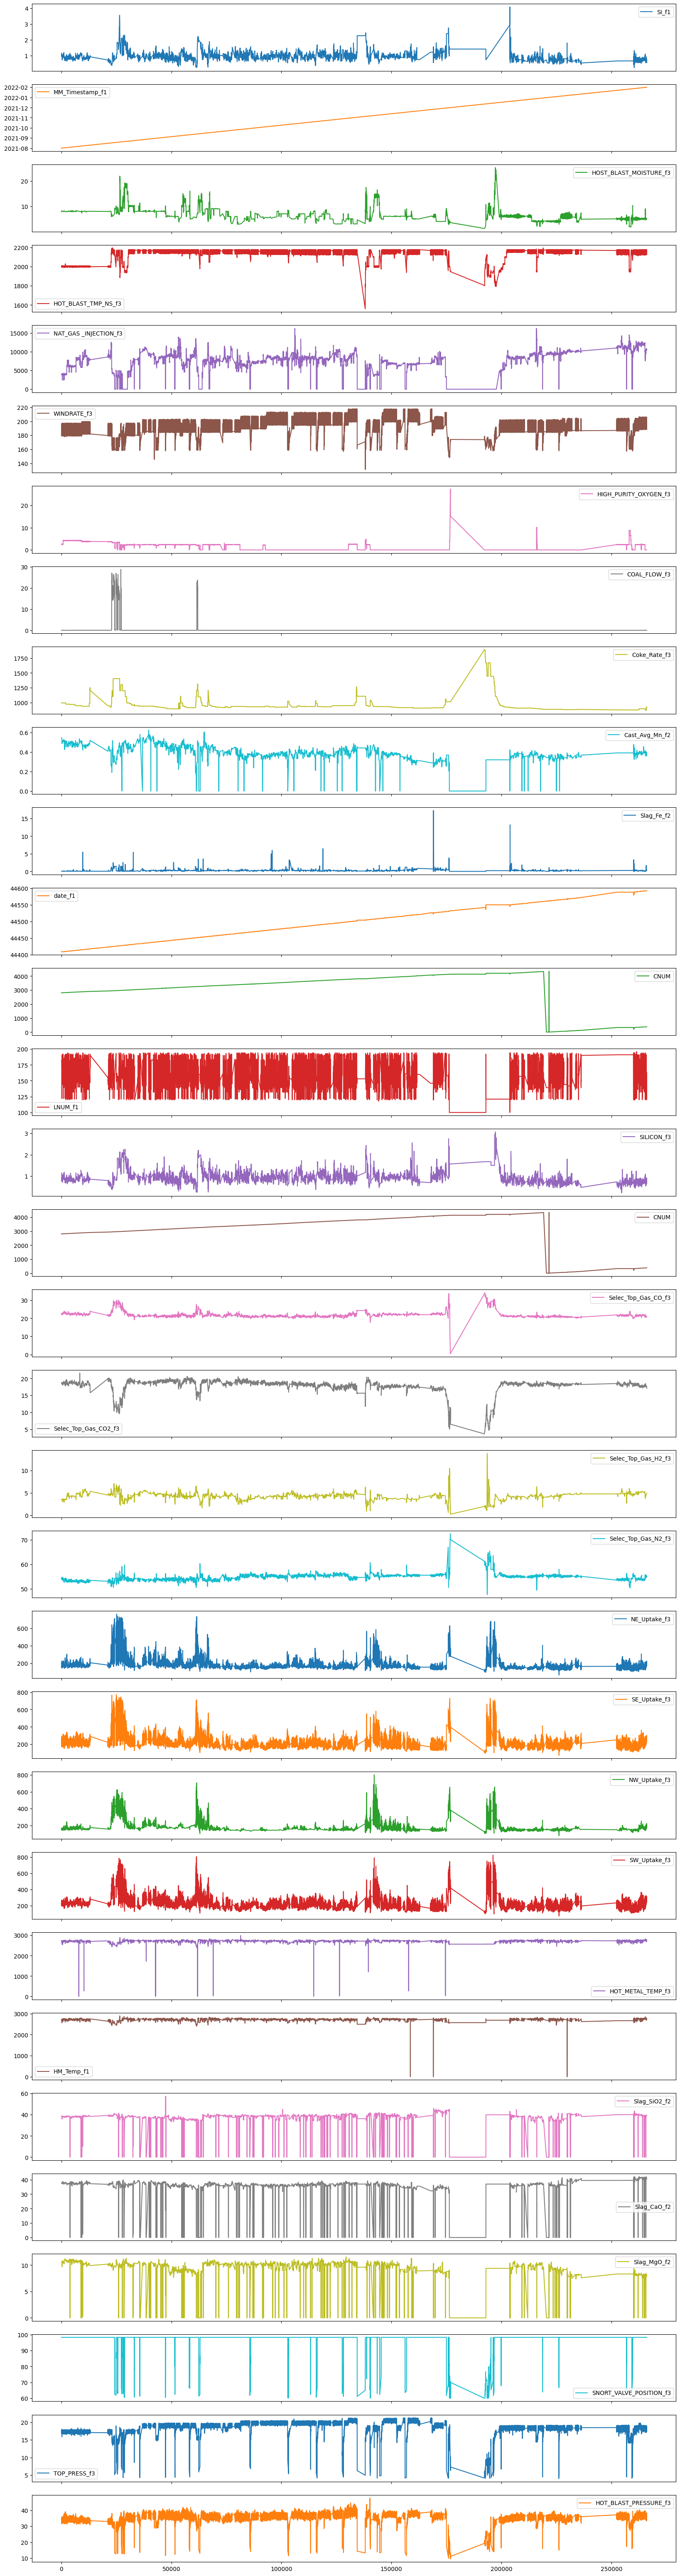

In [29]:

selected_cols_for_RNN_data_CIVS_df.plot( figsize=(20,80),  subplots=True   )



## Average by CNUM



## Create vectors with 1 hour time delay


In [ ]:

cols_rotation_DF = selected_cols_for_RNN_data_CIVS_df.columns.values.tolist()
cols_rotation_DF



In [ ]:

idx = selected_cols_for_RNN_data_CIVS_df.index[ : -60]
print(idx)


In [ ]:

y_1_hour = selected_cols_for_RNN_data_CIVS_df.iloc[ 60: , 0 ].values
y_1_hour.shape


In [ ]:

y_1_hour


In [ ]:

x_1_hour = selected_cols_for_RNN_data_CIVS_df.iloc[ :-60 , 1: ].values
x_1_hour.shape


In [ ]:

cols_rotation_DF[0]


In [ ]:

cols_rotation_DF[1:]


In [ ]:

df_xs = pd.DataFrame(x_1_hour  , columns=cols_rotation_DF[1:],  index=idx)
df_y  = pd.DataFrame(y_1_hour  , columns=[cols_rotation_DF[0]],   index=idx)


In [ ]:

print(df_y.shape)
print(df_xs.shape)



In [ ]:

df_res = pd.concat( [ df_y, df_xs], axis=1 )     
print(df_res.shape)


In [ ]:

df_res


In [ ]:
'''
1. HB Moist (from 265,000 row file) – Hot blast moisture, should have an impact within 1hr

2. Top Gas -> Avg the following [uptakeSW.1, uptakeNE.1, uptakeSE.1, uptakeNW.1] (from 265,000 row file ) 
– Top gas temperatures, should have an impact within 1hr

3. TGC0.1       (from 265,000 row file) – Top gas CO content, should have an impact within 1hr

4. TGC02.1      (from 265,000 row file) – Top gas CO2 content, should have an impact within 1hr

5. TGH2.1       (from 265,000 row file) – Top gas H2 content, should have an impact within 1hr

6. TGN2.1       (from 265,000 row file) – Top gas N2 content, should have an impact within 1hr

7. HB Temp.1 (from 265,000 row file) – Hot blast temperature, should have an impact within 1hr

8. WINDRATE_f3 - Blast furnace wind rate (kSCFM), should have an impact within 1hr

9. HIGH_PURITY_OXYGEN_f3 - Oxygen enrichment, should have an impact within 1hr

10. COAL_FLOW_f3 - Coal injection rate, should have an impact within 1hr

11. NAT_GAS_INJECTION_f3 - Natural gas injection rate, should have an impact within 1hr

12. Coke_Rate (check with USS to determine the hrly charge Coke Rate) - include later - 6hrs impact


Previous cast average values of:

13. Cast_Avg_Si_f2 (timestamp from 6000 row file)

14. Cast_Avg_Mn_f2 (timestamp from 6000 row file)

15. Slag_Fe_f2 (timestamp from 6000 row file)


'''

 
 


cols_1_hour_rc = [ 'SI_f1', 'MM_Timestamp_f1', 'HOST_BLAST_MOISTURE_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 
                   'SW_Uptake_f3', 'Selec_Top_Gas_CO_f3',  'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 'Selec_Top_Gas_N2_f3',
                   'HOT_BLAST_TMP_NS_f3',  'WINDRATE_f3',  'HIGH_PURITY_OXYGEN_f3',  'COAL_FLOW_f3',
                    'NAT_GAS _INJECTION_f3']


In [ ]:

cols_1_hour_rc 


In [ ]:

df_si_1hour_xs = df_res[ cols_1_hour_rc  ]


In [ ]:

df_si_1hour_xs



## Now add 6 hour delay 


In [ ]:

selected_cols_for_RNN_data_CIVS_df


In [ ]:

x_coke_6_df = selected_cols_for_RNN_data_CIVS_df['Coke_Rate_f3']
x_coke_6_df.shape 


In [ ]:

x_coke_6_df


In [ ]:

60*6


In [ ]:

x_coke_6_hour = x_coke_6_df.iloc[ 360:  ].values
x_coke_6_hour.shape



In [ ]:

df_si_1hour_xs.shape


In [ ]:

266036 - 300


In [ ]:

si_and_1_hour_x = df_si_1hour_xs.iloc[ :-300 , :  ].values
si_and_1_hour_x.shape


In [ ]:

cols_rotation_DF = df_si_1hour_xs.columns.values.tolist()
cols_rotation_DF


In [ ]:


idx = df_si_1hour_xs.index[ : -300]
print(idx)


In [ ]:

df_si_x    = pd.DataFrame(si_and_1_hour_x , columns=cols_rotation_DF,         index=idx)
df_x_coke  = pd.DataFrame(x_coke_6_hour   , columns=['Coke_Rate_f3'],         index=idx)



In [ ]:

print(df_x_coke.shape)
print(df_si_x.shape)


In [ ]:


df_res_1h_6h = pd.concat( [ df_si_x, df_x_coke], axis=1 )     
print(df_res_1h_6h .shape)


In [ ]:

df_res_1h_6h 



## Now the precast ones


In [ ]:

df_res_1h_6h 


In [ ]:

list_counts = selected_cols_for_RNN_data_CIVS_df.groupby(['Timestamp_f1'])['SI_f1'].count().tolist()
list_counts

In [ ]:

l_np = np.array( list_counts )
l_np.mean()


In [ ]:

## selected_cols_for_RNN_data_CIVS_df

count_casts_df = selected_cols_for_RNN_data_CIVS_df['Timestamp_f1']



In [ ]:

count_casts_df


In [ ]:

## selected_cols_for_RNN_data_CIVS_df



In [ ]:

l_prev_casts = ['Cast_Avg_Si_f2', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2']

Prev_cast_44_df = selected_cols_for_RNN_data_CIVS_df[l_prev_casts ]
Prev_cast_44_df.shape 


In [ ]:

pre_cast_to_concat = Prev_cast_44_df.iloc[ 44:-316 , :  ].values
pre_cast_to_concat.shape



In [ ]:

si_x_1h_6h = df_res_1h_6h.iloc[ : , :  ].values
si_x_1h_6h.shape


In [ ]:

## pre_cast_to_concat
## si_x_1h_6h


In [ ]:

cols_rotation_precast_DF = df_res_1h_6h.columns.values.tolist()
cols_rotation_precast_DF


In [ ]:

idx = df_res_1h_6h.index[ :]
print(idx)


In [ ]:

df_si_rc1       = pd.DataFrame(si_x_1h_6h           , columns=cols_rotation_precast_DF,                             index=idx)
df_precast_rc2  = pd.DataFrame(pre_cast_to_concat   , columns=['Cast_Avg_Si_f2', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2'],   index=idx)


In [ ]:

df_si_rc1.shape


In [ ]:

df_precast_rc2.shape


In [ ]:

df_ALL_delays_aligned = pd.concat( [ df_si_rc1, df_precast_rc2], axis=1 )     
print(df_ALL_delays_aligned.shape)


In [ ]:

df_ALL_delays_aligned


In [ ]:

df_ALL_delays_aligned.to_csv('RNN_time_DELAYS_265736_1h6hPreCast_rcalix.csv')
